<a href="https://colab.research.google.com/github/mb16biswas/Dogs_Classifier-/blob/main/Dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Using Transfer Learning for classifying 120 breeds of dog***

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
import pandas as pd
labels_csv = pd.read_csv("./dog-breed-identification/labels.csv")


print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     2ebed4a14973b0211b5802b15a3bfcf4  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<AxesSubplot:>

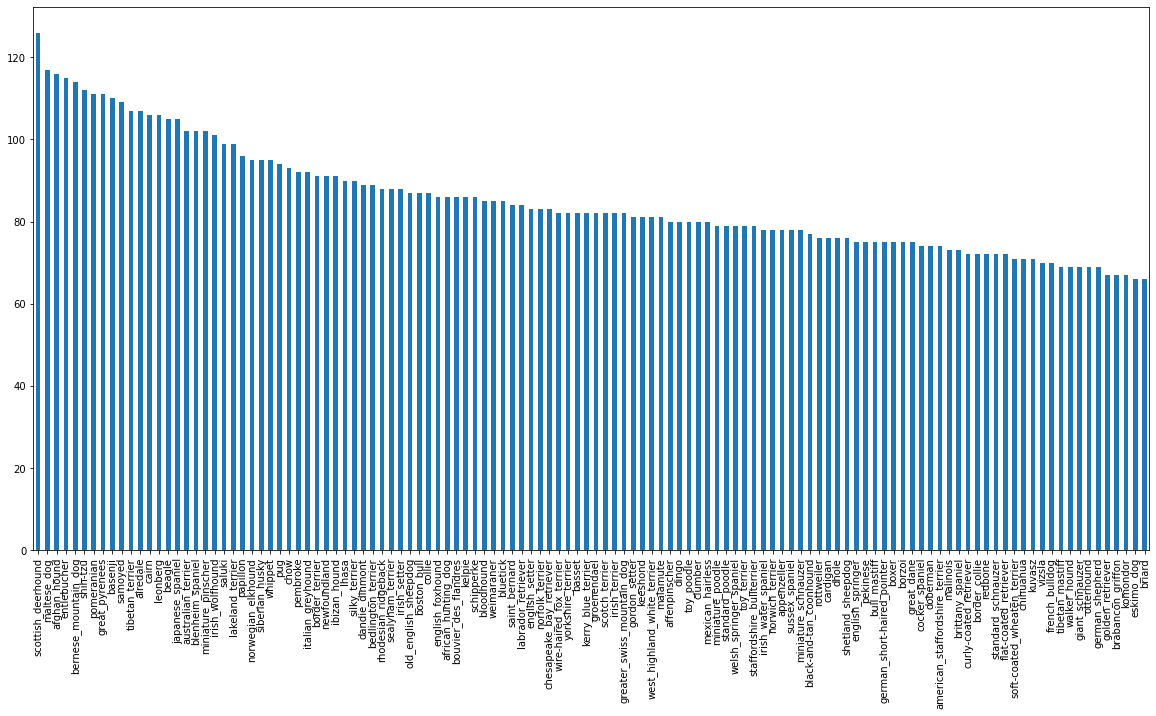

In [3]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize = (20,10))

In [4]:
pd.DataFrame(labels_csv)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [5]:
filenames = ["./dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]

In [6]:
filenames[:4]

['./dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 './dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 './dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 './dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg']

In [7]:
# Check whether number of filenames matches 
import os
if len(os.listdir("./dog-breed-identification/train")) == len(filenames):
  print("true")
else:
  print("fasle")

true


In [8]:
from IPython.display import display, Image

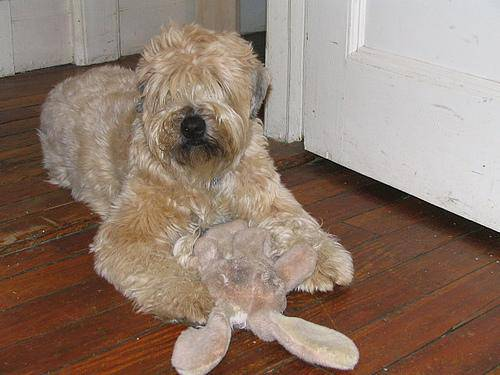

In [9]:
Image(filename= filenames[7896])

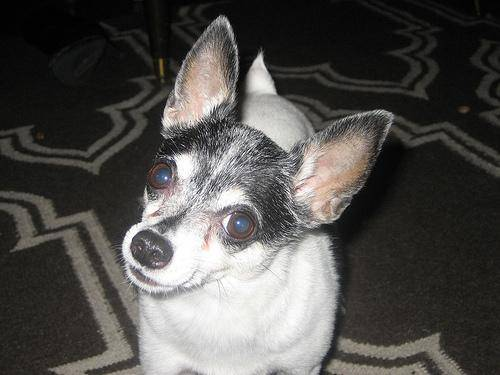

In [10]:
Image(filename= filenames[7701])

In [11]:
import numpy as np
labels = labels_csv["breed"]
print(type(labels))
labels = np.array(labels)
print(type(labels))
print(labels[:5])


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
['boston_bull' 'dingo' 'pekinese' 'bluetick' 'golden_retriever']


In [12]:
if len(labels) == len(filenames):
  print("true")
else:
  print("false")

true


In [67]:
unique_breeds = np.unique(labels)
# print(len(unique_breeds))
print(unique_breeds)

['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever' 'gordon_setter' 'great_dane' 'great_pyrenees'
 'greater_swiss_mountain_dog' 'groenendael' 'ibizan_hound' 'irish_setter'
 'irish_terrier' 'irish_water_spaniel' 'irish_wolfhound'
 'italian

In [14]:
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

# Creating training and testing ***datasets***

In [15]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [16]:
Num = 1000
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(8177, 8177, 2045, 2045)

In [17]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
print(image.shape)
print(image)

(257, 350, 3)
[[[ 89 137  87]
  [ 76 124  74]
  [ 63 111  59]
  ...
  [ 76 134  86]
  [ 76 134  86]
  [ 76 134  86]]

 [[ 72 119  73]
  [ 67 114  68]
  [ 63 111  63]
  ...
  [ 75 131  84]
  [ 74 132  84]
  [ 74 131  86]]

 [[ 56 104  66]
  [ 58 106  66]
  [ 64 112  72]
  ...
  [ 71 127  82]
  [ 73 129  84]
  [ 73 130  85]]

 ...

 [[  2  11  10]
  [  5  14  13]
  [  6  15  14]
  ...
  [120 113  67]
  [126 118  72]
  [122 114  67]]

 [[  0   4   6]
  [  0   9   8]
  [  1  10   9]
  ...
  [105  98  52]
  [111 104  58]
  [111 103  56]]

 [[ 18  16  37]
  [ 18  18  28]
  [ 17  20  11]
  ...
  [101  92  53]
  [ 97  88  49]
  [120 111  72]]]


In [74]:
IMG_SIZE = 224

def process_image(image_path):
      """
      Takes an image file path and turns it into a Tensor.
      """
      # Read in image file
      image = tf.io.read_file(image_path)
    
      # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
      image = tf.image.decode_jpeg(image, channels=3)
     
      # Convert the colour channel values from 0-225 values to 0-1 values
      image = tf.image.convert_image_dtype(image, tf.float32)
      # Resize the image to our desired size (224, 244)
      image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
     
     
      return image

In [75]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [76]:
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """

  """  With the help of tf.data.Dataset.from_tensor_slices() method, we can get the slices of an array
  in the form of objects by using tf.data.Dataset.from_tensor_slices() method."""
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [77]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [22]:
#test 
# test_data = create_data_batches(X_train, test_data=True)

# Creating test data batches...
# image   Tensor("resize/Squeeze:0", shape=(224, 224, 3), dtype=float32)

test_data = create_data_batches(X_train[0:1], test_data=True)

process_image(X_train[0])




Creating test data batches...
image   Tensor("resize/Squeeze:0", shape=(224, 224, 3), dtype=float32)
image   tf.Tensor(
[[[0.73719394 0.7528802  0.7489587 ]
  [0.8167536  0.8324399  0.82851833]
  [0.9000502  0.9157365  0.9118149 ]
  ...
  [0.22489497 0.3856793  0.56607145]
  [0.21313027 0.38175774 0.5582283 ]
  [0.22247906 0.39110652 0.5675771 ]]

 [[0.63523114 0.6509174  0.64699584]
  [0.9383297  0.954016   0.95009434]
  [0.97348964 0.98560965 0.9852543 ]
  ...
  [0.2432738  0.39229342 0.57660717]
  [0.22731304 0.39586627 0.572374  ]
  [0.23274691 0.40137437 0.577845  ]]

 [[0.76579654 0.7814828  0.7829359 ]
  [0.862963   0.8786493  0.88010234]
  [0.8519318  0.8676181  0.8690712 ]
  ...
  [0.22207634 0.37109596 0.55540967]
  [0.21012428 0.3712833  0.5514881 ]
  [0.2184262  0.381679   0.5608369 ]]

 ...

 [[0.6538026  0.6824879  0.78128815]
  [0.7087926  0.7335564  0.8152136 ]
  [0.65178466 0.6752879  0.7247214 ]
  ...
  [0.45317286 0.5472905  0.6963101 ]
  [0.5296807  0.6237984  0.764

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.73719394, 0.7528802 , 0.7489587 ],
        [0.8167536 , 0.8324399 , 0.82851833],
        [0.9000502 , 0.9157365 , 0.9118149 ],
        ...,
        [0.22489497, 0.3856793 , 0.56607145],
        [0.21313027, 0.38175774, 0.5582283 ],
        [0.22247906, 0.39110652, 0.5675771 ]],

       [[0.63523114, 0.6509174 , 0.64699584],
        [0.9383297 , 0.954016  , 0.95009434],
        [0.97348964, 0.98560965, 0.9852543 ],
        ...,
        [0.2432738 , 0.39229342, 0.57660717],
        [0.22731304, 0.39586627, 0.572374  ],
        [0.23274691, 0.40137437, 0.577845  ]],

       [[0.76579654, 0.7814828 , 0.7829359 ],
        [0.862963  , 0.8786493 , 0.88010234],
        [0.8519318 , 0.8676181 , 0.8690712 ],
        ...,
        [0.22207634, 0.37109596, 0.55540967],
        [0.21012428, 0.3712833 , 0.5514881 ],
        [0.2184262 , 0.381679  , 0.5608369 ]],

       ...,

       [[0.6538026 , 0.6824879 , 0.78128815],
        [0.70

In [27]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

# ***Visualizing data batches***

In [28]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

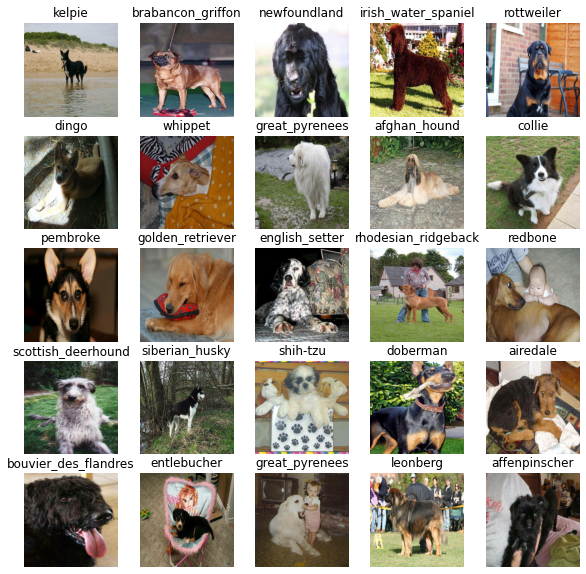

In [29]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

# Creating the ***model***

In [30]:
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
#include_top = false , we dont include the classifier 


9412608/9406464 [==============================] - 4s 0us/step


In [31]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [32]:
base_model.trainable = False

In [33]:

base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [34]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [35]:
prediction_layer = tf.keras.layers.Dense(120 , activation='softmax')

In [36]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               153720    
Total params: 2,411,704
Trainable params: 153,720
Non-trainable params: 2,257,984
_________________________________________________________________


In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
# train_data 
# val_data
# model.fit(x = train_data , validation_data= val_data , epochs= 50)

In [39]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.989):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()    
#model.fit(x = train_data , validation_data= val_data , epochs= 15 , callbacks=[callbacks])  

In [40]:
model.fit(x = train_data , validation_data= val_data , epochs= 15 , callbacks=[callbacks]) 

Epoch 1/15
256/256 [==============================] - 356s 1s/step - loss: 1.7763 - accuracy: 0.5761 - val_loss: 0.9872 - val_accuracy: 0.7066
Epoch 2/15
256/256 [==============================] - 323s 1s/step - loss: 0.5996 - accuracy: 0.8349 - val_loss: 0.8320 - val_accuracy: 0.7438
Epoch 3/15
256/256 [==============================] - 317s 1s/step - loss: 0.3825 - accuracy: 0.9002 - val_loss: 0.7973 - val_accuracy: 0.7584
Epoch 4/15
256/256 [==============================] - 318s 1s/step - loss: 0.2585 - accuracy: 0.9411 - val_loss: 0.7807 - val_accuracy: 0.7570
Epoch 5/15
256/256 [==============================] - 317s 1s/step - loss: 0.1828 - accuracy: 0.9708 - val_loss: 0.7660 - val_accuracy: 0.7579
Epoch 6/15
256/256 [==============================] - 318s 1s/step - loss: 0.1364 - accuracy: 0.9824 - val_loss: 0.7647 - val_accuracy: 0.7653
Epoch 7/15
256/256 [==============================] - ETA: 0s - loss: 0.1035 - accuracy: 0.9901
Reached 98% accuracy so cancelling training!
2

# prediction 

In [41]:
history = model

In [42]:
test_data = create_data_batches(X_val, test_data= True)


Creating test data batches...


In [43]:
pre = history.predict(test_data)

In [44]:
unique_breeds[np.argmax(pre[0])]     #for 1st image in testing data 

'toy_terrier'

# ***SAVING THE MODEL***

In [45]:
model.save("dogs_classifier.h5") # you can use the train model later 

In [29]:
new_model = tf.keras.models.load_model('dogs_classifier.h5') 

In [47]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               153720    
Total params: 2,411,704
Trainable params: 153,720
Non-trainable params: 2,257,984
_________________________________________________________________


# ***predicting on custome images*** 

In [48]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  test_data = create_data_batches([path], test_data= True)
  pre = new_model.predict(test_data)
  print("it is" , unique_breeds[np.argmax(pre[0])] )

  

  

ModuleNotFoundError: No module named 'google.colab'